<a href="https://colab.research.google.com/github/alejitalaanalitica/Bootcamp_Data_Science/blob/main/Actividad_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preguntas de interés o hipótesis:

¿Cuál es la tendencia de ventas a lo largo del tiempo?

¿Qué tiendas tienen el mayor volumen de ventas?

¿Existe una diferencia significativa en las ventas entre las tiendas de diferentes departamentos? -

¿Qué marca es la más popular en términos de ventas?


In [13]:
from google.colab import files
uploaded = files.upload()

Saving Ventas_.xlsx to Ventas_ (3).xlsx


In [14]:
import pandas as pd

data = pd.read_excel('Ventas_.xlsx')

¿Cuál es la tendencia de ventas a lo largo del tiempo?

> Se evidencia en la grafica que las ventas han ido disminuyendo en el ultimo año.



<ipython-input-26-c40e0aa295e0>:6: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



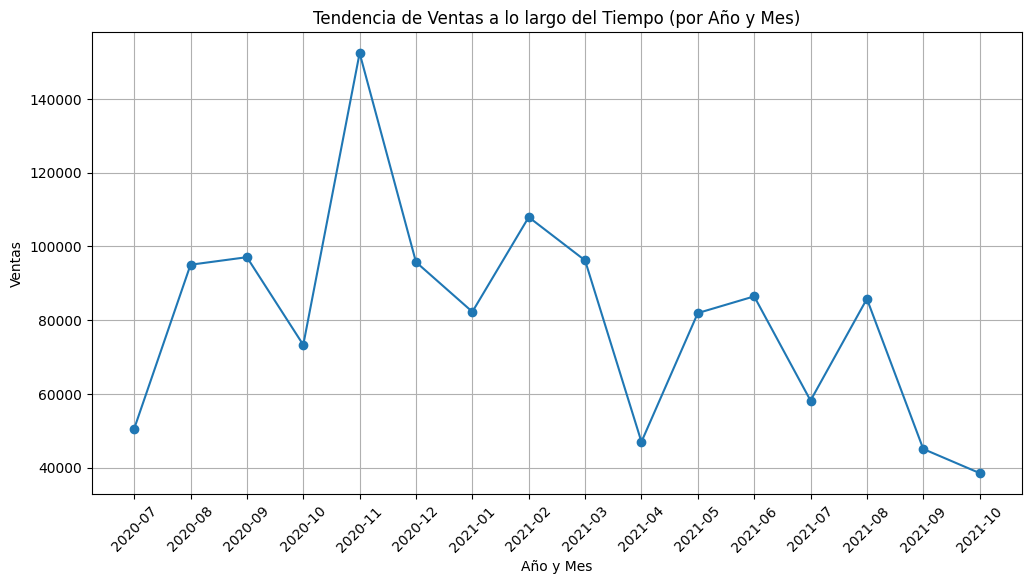

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel('Ventas_.xlsx')

data['Fecha'] = pd.to_datetime(data['Fecha'])

# elimino ventas del año 1970
data = data[data['Fecha'].dt.year != 1970]

ventas_por_mes = data.groupby([data['Fecha'].dt.year, data['Fecha'].dt.month])['No ventas'].sum()

ventas_por_mes.index = ventas_por_mes.index.set_names(['Año', 'Mes'])

plt.figure(figsize=(12, 6))
ventas_por_mes.plot(kind='line', marker='o')
plt.title('Tendencia de Ventas a lo largo del Tiempo (por Año y Mes)')
plt.xlabel('Año y Mes')
plt.ylabel('Ventas')
plt.grid()

labels = [f"{year}-{month:02d}" for year, month in ventas_por_mes.index]
plt.xticks(range(len(ventas_por_mes)), labels, rotation=45)

plt.show()

¿Qué tiendas tienen el mayor volumen de ventas?

> Se evidencia que la tienda TechTrove es la tienda que mas ventas realiza seguido de la tienda DigitalDepor, la tienda que menos vende es HiperTech Hub




<ipython-input-20-2c404f015fb7>:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Fecha'] = pd.to_datetime(data['Fecha'])


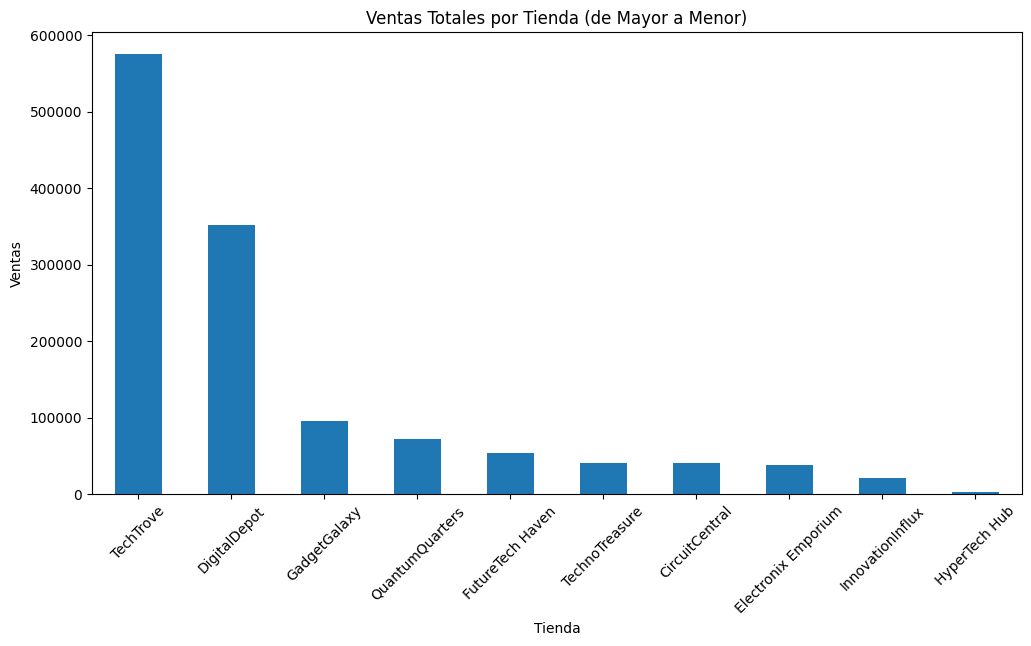

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel('Ventas_.xlsx')

data['Fecha'] = pd.to_datetime(data['Fecha'])

data = data[data['Fecha'].dt.year != 1970]

ventas_por_tienda = data.groupby('Tienda')['No ventas'].sum()

ventas_por_tienda = ventas_por_tienda.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ventas_por_tienda.plot(kind='bar')
plt.title('Ventas Totales por Tienda (de Mayor a Menor)')
plt.xlabel('Tienda')
plt.ylabel('Ventas')

labels = ventas_por_tienda.index
plt.xticks(range(len(labels)), labels, rotation=45)

plt.show()

¿Existe una diferencia significativa en las ventas entre las tiendas de diferentes departamentos? -

<ipython-input-21-69c0462be48c>:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Fecha'] = pd.to_datetime(data['Fecha'])


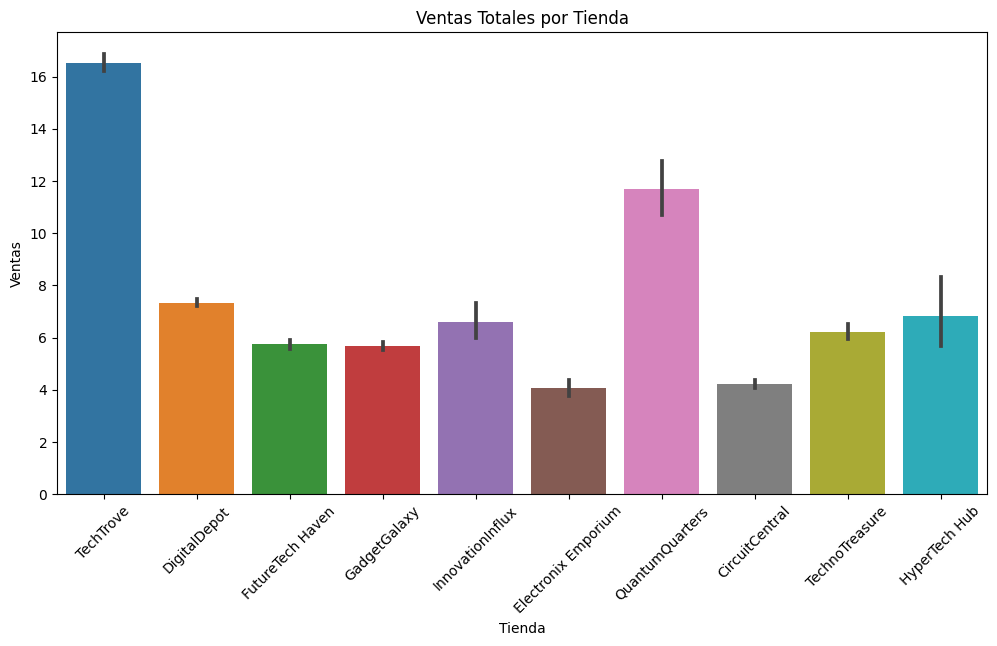

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('Ventas_.xlsx')

data['Fecha'] = pd.to_datetime(data['Fecha'])

data = data[data['Fecha'].dt.year != 1970]

plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Tienda', y='No ventas')
plt.title('Ventas Totales por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ventas')

labels = data['Tienda'].unique()
plt.xticks(range(len(labels)), labels, rotation=45)

plt.show()

¿Qué marca es la más popular en términos de ventas?

> la marca que mas vende es ByteFusion seguido de QuantumGear



In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

data = pd.read_excel('Ventas_.xlsx')

data['Fecha'] = pd.to_datetime(data['Fecha'])

data = data[data['Fecha'].dt.year != 1970]

ventas_por_marca = data.groupby('Marca')['No ventas'].sum()

ventas_por_marca = ventas_por_marca.sort_values(ascending=False)

top_20_marcas = ventas_por_marca.head(20)

fig = px.bar(top_20_marcas, x=top_20_marcas.index, y=top_20_marcas.values, title='Top 20 de Marcas que Más Venden (de Mayor a Menor)')

fig.update_xaxes(categoryorder='total ascending')
fig.update_xaxes(title_text='Marca')
fig.update_yaxes(title_text='Ventas')
fig.show()

<ipython-input-27-4dde9d08f986>:9: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.

